In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving Ecommerce Customers.csv to Ecommerce Customers.csv


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
import io
import seaborn as sns

In [ ]:
df=pd.read_csv(io.StringIO(uploaded['Ecommerce Customers.csv'].decode('utf-8')))
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
cdf=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]
cdf.corr()['Time on App']

Avg. Session Length    -0.027826
Time on App             1.000000
Time on Website         0.082388
Length of Membership    0.029143
Yearly Amount Spent     0.499328
Name: Time on App, dtype: float64

In [ ]:
cdf=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]
cdf.corr()['Avg. Session Length']

Avg. Session Length     1.000000
Time on App            -0.027826
Time on Website        -0.034987
Length of Membership    0.060247
Yearly Amount Spent     0.355088
Name: Avg. Session Length, dtype: float64

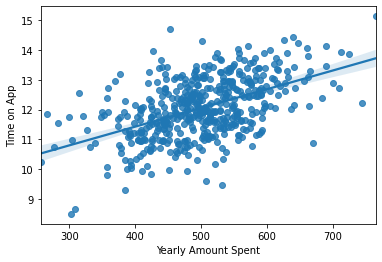

In [ ]:
sns.regplot(x='Yearly Amount Spent',y='Time on App', data=df)

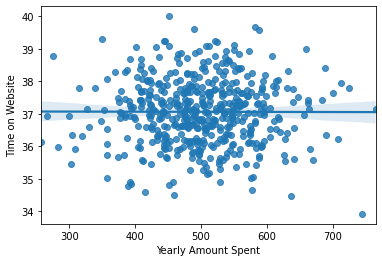

In [ ]:
sns.regplot(x='Yearly Amount Spent',y='Time on Website', data=df)

In [ ]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]
from sklearn import linear_model
from sklearn.metrics import r2_score

regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Yearly Amount Spent']])
train_y=np.asanyarray(train[['Time on App']])
regr.fit(train_x,train_y)

test_x=np.asanyarray(test[['Yearly Amount Spent']])
test_y=np.asanyarray(test[['Time on App']])
test_y_=regr.predict(test[['Yearly Amount Spent']])
r2_score(test_y,test_y_)

0.23284049842957677

In [ ]:
train_x=np.asanyarray(train[['Yearly Amount Spent']])
train_y=np.asanyarray(train[['Time on Website']])
regr.fit(train_x,train_y)

test_x=np.asanyarray(test[['Yearly Amount Spent']])
test_y=np.asanyarray(test[['Time on Website']])
test_y_=regr.predict(test[['Yearly Amount Spent']])
r2_score(test_y,test_y_)

-0.0003505168604183151

Kaggle solution

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


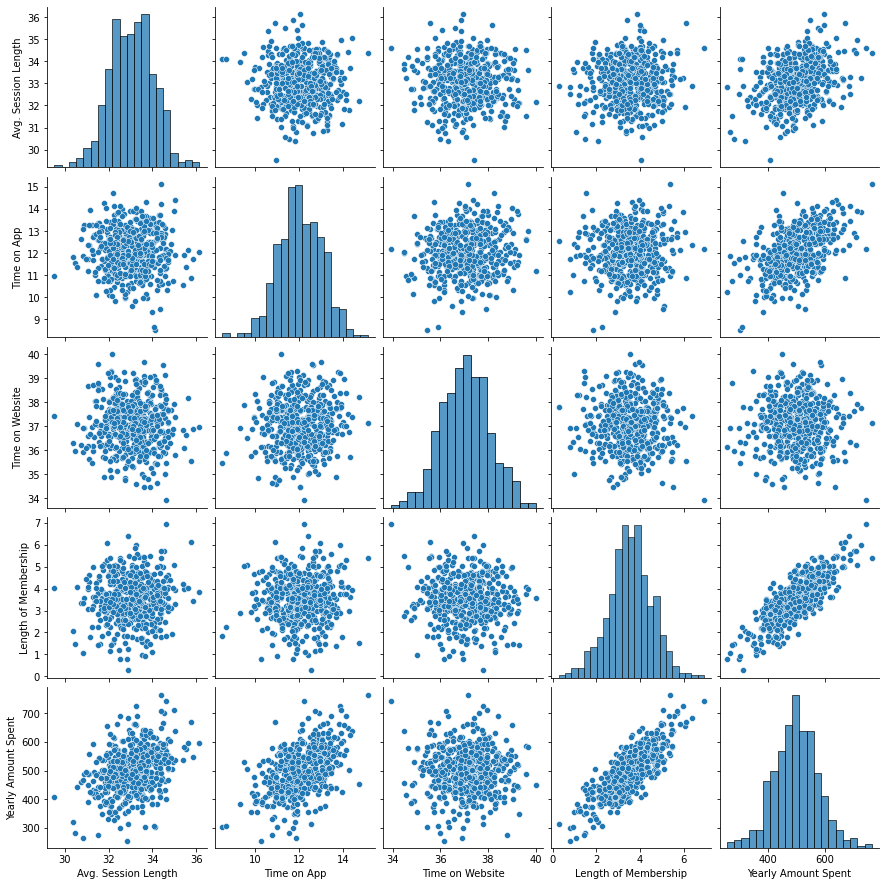

In [ ]:
sns.pairplot(df)

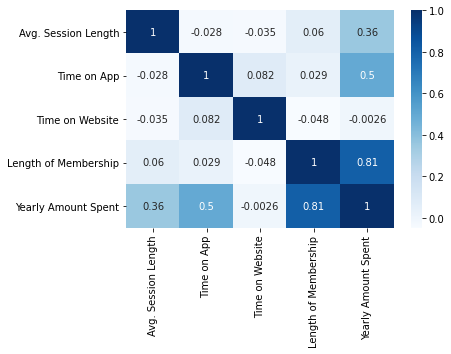

In [ ]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [ ]:
x=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df[['Yearly Amount Spent']]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

Text(0, 0.5, 'Predicted Y')

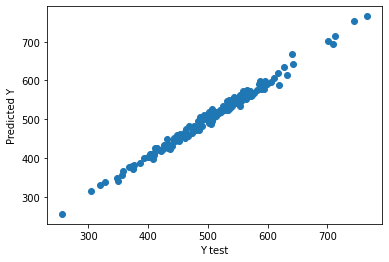

In [ ]:
pred=lm.predict(x_test)
plt.scatter(y_test,pred)
plt.xlabel('Y test')
plt.ylabel("Predicted Y")

In [ ]:
from sklearn import metrics 
print("Mean Absolute Eroor ", metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred))
print("Root mean squared error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Eroor  7.2281486534308295
Mean Squared Error: 79.8130516509743
Root mean squared error: 8.933815066978626


In [ ]:
coeffecients = pd.DataFrame([[lm.coef_]],[x.columns])
coeffecients.columns = ['Coeffecient']
print(coeffecients)

                                                            Coeffecient
Avg. Session Length   [[25.981549723495792, 38.59015875311409, 0.190...
Time on App           [[25.981549723495792, 38.59015875311409, 0.190...
Time on Website       [[25.981549723495792, 38.59015875311409, 0.190...
Length of Membership  [[25.981549723495792, 38.59015875311409, 0.190...


In [ ]:
pd.DataFrame(lm.coef_.transpose(), x.columns, columns=['Coeffecient'])


,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


From the above data, Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response. So, according to the above, a unit increase in Time on App will increase the money spent by dollar 38  while a unit increase in Time on Website will increase the money spent by $0.19.

The company can either focus more on App or could invest to grow sales form website since the sales from website is very low 